## name: Chunsheng Fang

## github name: chunshengFang
## usc id :5043794779

In [22]:
pip install -U imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
Note: you may need to restart the kernel to use updated packages.


In [24]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [158]:
# Package Initialization
import numpy as np
import pandas as pd
import statistics as stat
import sklearn.metrics as met
import matplotlib.pyplot as plt
import imblearn.over_sampling as samp
import sklearn.neighbors as neighbors
import numpy as np
import pandas as pd


#  A. Download the data

In [159]:
WPBC = pd.read_csv(r'./data/wpbc.data',names = cols)
cols = ['ID','Outcome','Income',
        'Rad.1','Tex.1','Peri.1','Area.1','Smooth.1','Compact.1','Concavity.1','CP.1','Symm.1','FD.1',
        'Rad.2','Tex.2','Peri.2','Area.2','Smooth.2','Compact.2','Concavity.2','CP.2','Symm.2','FD.2',
        'Rad.3','Tex.3','Peri.3','Area.3','Smooth.3','Compact.3','Concavity.3','CP.3','Symm.3','FD.3',
        'TumorSize','LymphNodes'];
print('XXX.1 : Mean of XXX')
print('XXX.2 : Std. Dev. of XXX')
print('XXX.3 : Mean_Top3 of XXX')

XXX.1 : Mean of XXX
XXX.2 : Std. Dev. of XXX
XXX.3 : Mean_Top3 of XXX


In [160]:
# Change N/R to 0/1
WPBC.replace('N',0,inplace=True); # change the non-recurrent values to false (0)
WPBC.replace('R',1,inplace=True); # change the recurrent values to true (1)

In [161]:
WPBC.drop('Compact.1',axis='columns',inplace=True) # Removes Compactness mean
WPBC.drop('Compact.2',axis='columns',inplace=True) # Removes Compactness std. dev.
WPBC.drop('Compact.3',axis='columns',inplace=True) # Removes Compactness mean3
WPBC.drop('ID', axis='columns',inplace=True) # Removes patient ID; has no effect on recurrence

In [162]:
WPBC

,Outcome,Income,Rad.1,Tex.1,Peri.1,Area.1,Smooth.1,Concavity.1,CP.1,Symm.1,...,Tex.3,Peri.3,Area.3,Smooth.3,Concavity.3,CP.3,Symm.3,FD.3,TumorSize,LymphNodes
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10860,0.07055,0.1865,...,37.08,139.70,1436.0,0.11950,0.3140,0.11700,0.2677,0.08113,5.0,5
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.7119,0.26540,0.4601,0.11890,3.0,2
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.12550,0.08180,0.2333,...,20.98,159.10,1949.0,0.11880,0.3414,0.20320,0.4334,0.09067,2.5,0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.6869,0.25750,0.6638,0.17300,2.0,0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,10,22.52,21.92,146.90,1597.0,0.07592,0.06862,0.06367,0.1728,...,24.81,162.10,1902.0,0.08191,0.1056,0.09378,0.2061,0.05788,6.0,2
194,0,8,15.44,31.18,101.00,740.4,0.09399,0.13750,0.06500,0.1735,...,41.48,112.60,929.0,0.12720,0.2975,0.12860,0.2914,0.08024,1.5,0
195,0,12,17.17,29.19,110.00,915.3,0.08952,0.06583,0.05068,0.1793,...,36.66,132.50,1295.0,0.12610,0.2141,0.09520,0.3362,0.06033,3.7,0
196,1,3,21.42,22.84,145.00,1440.0,0.10700,0.23800,0.13180,0.1884,...,27.98,198.30,2375.0,0.14980,0.5411,0.22150,0.2832,0.08981,3.0,?


# B.  select training set

In [163]:
NRSet = WPBC.loc[WPBC['Outcome'] == 0].reset_index()
RSet = WPBC.loc[WPBC['Outcome'] == 1].reset_index()
trainingSet = pd.DataFrame();
#trainingSet = trainingSet.append(NRSet.loc[0:129,:], ignore_index = True); # Add the 1st 130 non-recurrent cases to training set
#trainingSet = trainingSet.append(RSet.loc[0:36,:], ignore_index = True) # Add the 1st 37 recurrent cases to training set
#trainingSet = trainingSet.append(WPBC.loc[197,:],ignore_index = True); # Add row 197
trainingSet=pd.concat([trainingSet,NRSet.loc[0:129,:],RSet.loc[0:36,:],WPBC.loc[197:197,:]],ignore_index = True)
trainingSet.drop('index',axis='columns',inplace=True) # Removes index created training set creation
# Create test set with remaining rows
testSet = pd.DataFrame();
#testSet = testSet.append(NRSet.loc[130:195,:], ignore_index = True)
#testSet = testSet.append(RSet.loc[37:,:], ignore_index = True)
testSet=pd.concat([NRSet.loc[130:195,:],RSet.loc[37:,:]],ignore_index = True)
testSet.drop('index',axis='columns',inplace=True) # Removes index created training set creation
trainingSet
#testSet

,Outcome,Income,Rad.1,Tex.1,Peri.1,Area.1,Smooth.1,Concavity.1,CP.1,Symm.1,...,Tex.3,Peri.3,Area.3,Smooth.3,Concavity.3,CP.3,Symm.3,FD.3,TumorSize,LymphNodes
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1086,0.07055,0.1865,...,37.08,139.70,1436.0,0.1195,0.3140,0.1170,0.2677,0.08113,5.0,5
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.7119,0.2654,0.4601,0.11890,3.0,2
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1255,0.08180,0.2333,...,20.98,159.10,1949.0,0.1188,0.3414,0.2032,0.4334,0.09067,2.5,0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.6869,0.2575,0.6638,0.17300,2.0,0
4,0,60,18.98,19.61,124.40,1112.0,0.09087,0.1213,0.08910,0.1727,...,25.45,152.60,1593.0,0.1144,0.2990,0.1922,0.2726,0.09581,1.5,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,5,15.08,25.74,98.00,716.6,0.10240,0.1235,0.06553,0.1647,...,33.22,121.20,1050.0,0.1660,0.4029,0.1526,0.2654,0.09438,2.6,0
164,1,2,22.01,21.90,147.20,1482.0,0.10630,0.2448,0.15010,0.1824,...,25.80,195.00,2227.0,0.1294,0.4756,0.2432,0.2741,0.08574,3.0,1
165,1,49,15.50,21.08,102.90,803.1,0.11200,0.1522,0.08481,0.2085,...,27.65,157.10,1748.0,0.1517,0.4211,0.2134,0.3003,0.10480,0.4,0
166,1,1,20.18,19.54,133.80,1250.0,0.11330,0.2133,0.12590,0.1724,...,25.07,146.00,1479.0,0.1665,0.5308,0.2173,0.3032,0.08075,4.5,27


# C.  Replace '?' with median Lymph Node size

In [164]:
trainingSet.replace('?',-1,inplace = True); # replace ?'s with absurd value that cannot be true
med = trainingSet.median(axis=0)
trainingSet.replace(-1,med['LymphNodes'],inplace = True); # replace absurd value with median value
trainingSet['LymphNodes'] = pd.to_numeric(trainingSet['LymphNodes']) # change col from str to numerical

testSet.replace('?',-1,inplace = True); # replace ?'s with absurd value that cannot be true
med = testSet.median(axis=0)
testSet.replace(-1,med['LymphNodes'],inplace = True); # replace absurd value with median value
testSet['LymphNodes'] = pd.to_numeric(testSet['LymphNodes']) # change col from str to numerical

# D.  Naive Bayes' Classification

In [165]:
def NaiveBayes(X_train,y_train,X_test,y_test): 
    # Description
    # y_train, y_test must be binary classes, set up as 0 or 1
    # X_train, X_test must be same length as corresponding y's
    # Need to filter out redundant features prior
    # Step 1 : create mxs for each class to get means, std.
    
    # Class 0
    len_y = np.arange(y_train.shape[0]);
    c0_train = np.zeros([1,X_train.shape[1]]);
    c1_train = np.zeros([1,X_train.shape[1]]);

    for i in len_y:
        if y_train[i] == 0:
            c0_train = np.vstack([c0_train,X_train[i,:]])
        else:
            c1_train = np.vstack([c1_train,X_train[i,:]])
    
    c0_train = np.delete(c0_train,0,0) # remove the first line to initialize the mx; not needed
    c1_train = np.delete(c1_train,0,0) # remove the first line to initialize the mx; not needed
    
    # Class 1
    len_y = np.arange(y_test.shape[0]);
    c0_test = np.zeros([1,X_test.shape[1]]);
    c1_test = np.zeros([1,X_test.shape[1]]);

    for i in len_y:
        if y_test[i] == 0:
            c0_test = np.vstack([c0_test,X_test[i,:]])
        else:
            c1_test = np.vstack([c1_test,X_test[i,:]])
    
    c0_test = np.delete(c0_test,0,0)
    c1_test = np.delete(c1_test,0,0)
  
    # Step 2 : Create a priori probabilities
    
    aprob1 = sum(y_train)/y_train.shape[0]; # sum up
    aprob0 = 1 - aprob1;
    
    # Step 3 : Calculate mean and standard deviation for each conditional class - training set only!
    
    p0_train = np.zeros([c0_train.shape[1],2]); # [mean, std]
    p1_train = np.zeros([c1_train.shape[1],2]); # [mean, std]

    
    counter = np.arange(c0_train.shape[1])
    for i in counter:
        p0_train[i,0] = c0_train[:,i].mean();
        p0_train[i,1] = c0_train[:,i].std()*np.sqrt(c0_train.shape[0]/(c0_train.shape[0]-1));
        
    counter = np.arange(c1_train.shape[1])
    for i in counter:        
        p1_train[i,0] = c1_train[:,i].mean();
        p1_train[i,1] = c1_train[:,i].std()*np.sqrt(c1_train.shape[0]/(c1_train.shape[0]-1));
    
    # Step 4 : Create probability Matrices from Training Set - assuming Conditional Gaussian
    
    prob0_train = np.zeros(X_train.shape) # prob mx for non-recurrent
    prob1_train = np.zeros(X_train.shape) # prob mx for recurrent
    
    prob0_test = np.zeros(X_test.shape) # prob mx for non-recurrent
    prob1_test = np.zeros(X_test.shape) # prob mx for recurrent

    counter = np.arange(X_train.shape[1]) # create counter for the for loop
    for i in counter: # for loop i for each feature
        num0 = np.array(-0.5*(X_train[:,i]-p0_train[i,0])/p0_train[i,1]);
        prob0_train[:,i] = 1/(np.sqrt(2*np.pi)*p0_train[i,1])*np.exp(num0) # create mx for non-recurrent

        num1 = np.array(-0.5*(X_train[:,i]-p1_train[i,0])/p1_train[i,1]);
        prob1_train[:,i] = 1/(np.sqrt(2*np.pi)*p1_train[i,1])*np.exp(num1) # create mx for recurrent
        
    counter = np.arange(X_test.shape[1]) # create counter for the for loop
    for i in counter: # for loop i for each feature
        num0 = np.array(-0.5*(X_test[:,i]-p0_train[i,0])**2/p0_train[i,1]**2);
        prob0_test[:,i] = 1/(np.sqrt(2*np.pi)*p0_train[i,1])*np.exp(num0) # create mx for non-recurrent

        num1 = np.array(-0.5*(X_test[:,i]-p1_train[i,0])**2/p1_train[i,1]**2);
        prob1_test[:,i] = 1/(np.sqrt(2*np.pi)*p1_train[i,1])*np.exp(num1) # create mx for recurrent
        
    # Step 5 : Classify predicts based on Naive Bayes classification
    
    # Training Set
    y_train_predict = np.zeros(y_train.shape[0])
    counter = np.arange(y_train.shape[0])
    for i in counter:
        condProb0 = np.prod(prob0_train[i,:])*aprob0; # Bayes Naive for 0 classification
        condProb1 = np.prod(prob1_train[i,:])*aprob1;
        
        if condProb1 > condProb0:
            y_train_predict[i] = 1;
    
    # Test Set
    y_test_predict = np.zeros(y_test.shape[0])
    counter = np.arange(y_test.shape[0])
    for i in counter:
        condProb0 = np.prod(prob0_test[i,:])*aprob0; # Bayes Naive for 0 classification
        condProb1 = np.prod(prob1_test[i,:])*aprob1;
        
        if condProb1 > condProb0:
            y_test_predict[i] = 1;
            
    # Step 6 : Compare the data against the true values
    
    # Calculate confusion Matrix
    cf = met.confusion_matrix(y_train,y_train_predict)
    print('---TRAINING DATA---\n')
    print('Confusion Matrix : \n', cf, '\n')
    print('Classification Report : \n', met.classification_report(y_train,y_train_predict), '\n')
    
    cf = met.confusion_matrix(y_test,y_test_predict)
    print('---TEST DATA---\n')
    print('Confusion Matrix : \n', cf, '\n')
    print('Classification Report : \n', met.classification_report(y_test,y_test_predict), '\n')
    
    # Plot ROC-AUC data
    figs, axs = plt.subplots(1,2)
    
    fpr, tpr, thresholds = met.roc_curve(y_train,y_train_predict)
    roc_auc = met.auc(fpr,tpr)
    print('Training AUC : \t', roc_auc)
    axs[0].plot(fpr,tpr, c = 'red');
    axs[0].plot([0, 1], [0, 1], color='black', linestyle='--');
    axs[0].set_title('ROC Curve - Training Data');
    axs[0].set_ylabel('True Positive Rate');
    axs[0].set_xlabel('False Positive Rate');
    #axs[0].legend(loc='lower right');
    
    fpr, tpr, thresholds = met.roc_curve(y_test,y_test_predict)
    roc_auc = met.auc(fpr,tpr)
    print('Test AUC : \t', roc_auc)
    axs[1].plot(fpr,tpr, c = 'red');
    axs[1].plot([0, 1], [0, 1], color='black', linestyle='--');
    axs[1].set_title('ROC Curve - Test Data');
    axs[1].set_ylabel('True Positive Rate');
    axs[1].set_xlabel('False Positive Rate');
    #axs[1].legend(loc='lower right');
    
    plt.tight_layout()
    
    return [y_train_predict,y_test_predict]

## D(i). Solve the problem using a Na¨ıve Bayes’ classifier

---TRAINING DATA---

Confusion Matrix : 
 [[  6 125]
 [  0  37]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.05      0.09       131
           1       0.23      1.00      0.37        37

    accuracy                           0.26       168
   macro avg       0.61      0.52      0.23       168
weighted avg       0.83      0.26      0.15       168
 

---TEST DATA---

Confusion Matrix : 
 [[12  9]
 [ 5  5]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.57      0.63        21
           1       0.36      0.50      0.42        10

    accuracy                           0.55        31
   macro avg       0.53      0.54      0.52        31
weighted avg       0.59      0.55      0.56        31
 

Training AUC : 	 0.5229007633587786
Test AUC : 	 0.5357142857142857


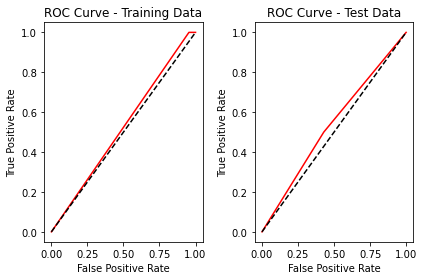

In [166]:
y_True = trainingSet['Outcome'];
X_True = np.array(trainingSet.drop('Outcome',axis='columns'));

y_Test = testSet['Outcome'];
X_Test = np.array(testSet.drop('Outcome',axis='columns'));

[yt1,yt2] = NaiveBayes(X_True,y_True,X_Test,y_Test) # Perform the Naive Bayes classification function above!

## D(ii). Balance the dataset and perform KNN

In [167]:
print('BEFORE : ')
print('Number of minority samples : ', sum(y_True))
print('Number of majority samples : ', y_True.shape[0] - sum(y_True))

# Step 1: Downsample the common class to 90 samples
#trainingSet2 = trainingSet.loc[trainingSet['Outcome']==0].loc[0:89]; # reduce the number of majority class samples to 90
#trainingSet2 = trainingSet2.append(trainingSet.loc[trainingSet['Outcome']==1])
trainingSet2=pd.concat([trainingSet.loc[trainingSet['Outcome']==0].loc[0:89],trainingSet.loc[trainingSet['Outcome']==1]])
# add back all the minority samples
X_True2 = np.array(trainingSet2.drop('Outcome',axis='columns'))
y = trainingSet2['Outcome']

#Step 2 : Upsample the minority class using SMOTE
smt = samp.SMOTE(k_neighbors = 5, sampling_strategy=1)
trainingSet2,y_True2 = smt.fit_resample(trainingSet2,y)

print('AFTER : ')
print('Number of minority samples : ', sum(y_True2))
print('Number of majority samples : ', y_True2.shape[0] - sum(y_True2))
trainingSet2

BEFORE : 
Number of minority samples :  37
Number of majority samples :  131
AFTER : 
Number of minority samples :  90
Number of majority samples :  90


,Outcome,Income,Rad.1,Tex.1,Peri.1,Area.1,Smooth.1,Concavity.1,CP.1,Symm.1,...,Tex.3,Peri.3,Area.3,Smooth.3,Concavity.3,CP.3,Symm.3,FD.3,TumorSize,LymphNodes
0,0,31,18.020000,27.600000,117.500000,1013.000000,0.094890,0.108600,0.070550,0.186500,...,37.080000,139.700000,1436.000000,0.119500,0.314000,0.117000,0.267700,0.081130,5.000000,5.000000
1,0,61,17.990000,10.380000,122.800000,1001.000000,0.118400,0.300100,0.147100,0.241900,...,17.330000,184.600000,2019.000000,0.162200,0.711900,0.265400,0.460100,0.118900,3.000000,2.000000
2,0,116,21.370000,17.440000,137.500000,1373.000000,0.088360,0.125500,0.081800,0.233300,...,20.980000,159.100000,1949.000000,0.118800,0.341400,0.203200,0.433400,0.090670,2.500000,0.000000
3,0,123,11.420000,20.380000,77.580000,386.100000,0.142500,0.241400,0.105200,0.259700,...,26.500000,98.870000,567.700000,0.209800,0.686900,0.257500,0.663800,0.173000,2.000000,0.000000
4,0,60,18.980000,19.610000,124.400000,1112.000000,0.090870,0.121300,0.089100,0.172700,...,25.450000,152.600000,1593.000000,0.114400,0.299000,0.192200,0.272600,0.095810,1.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,46,19.080541,24.853957,127.990861,1133.167514,0.113847,0.174049,0.129265,0.169471,...,31.359846,142.642641,1344.700572,0.131981,0.258280,0.171977,0.241413,0.086850,3.097293,3.724200
176,1,17,14.867612,26.447959,97.500495,693.866635,0.106923,0.139390,0.068720,0.190501,...,34.757845,122.340601,1007.994405,0.166708,0.520775,0.159916,0.326914,0.110002,3.937257,2.359865
177,1,8,20.150854,19.896864,133.022007,1281.874044,0.105670,0.200395,0.113496,0.193483,...,29.676533,179.579737,2368.819782,0.142478,0.550432,0.216198,0.334971,0.086168,3.678616,0.357232
178,1,6,26.055688,18.423950,175.926804,2062.459871,0.113698,0.325936,0.190535,0.192190,...,25.606263,227.442046,3230.065510,0.151732,0.620815,0.274114,0.350770,0.086548,4.390709,0.874331


## D(ii). new mean, std for the balanced training set

---TRAINING DATA---

Confusion Matrix : 
 [[ 0 90]
 [ 0 90]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.50      1.00      0.67        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180
 

---TEST DATA---

Confusion Matrix : 
 [[10 11]
 [ 3  7]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.48      0.59        21
           1       0.39      0.70      0.50        10

    accuracy                           0.55        31
   macro avg       0.58      0.59      0.54        31
weighted avg       0.65      0.55      0.56        31
 

Training AUC : 	 0.5
Test AUC : 	 0.588095238095238


C:\Users\Fcs10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fcs10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fcs10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


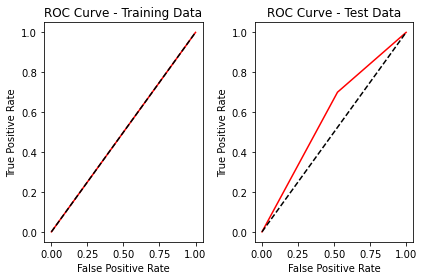

In [168]:
X_True2 = np.array(trainingSet2.drop('Outcome',axis='columns'))

[yt3, yt4] = NaiveBayes(X_True2,y_True2,X_Test,y_Test);

# E. Extra Practice


In [177]:
# Start from scratch; re-read in the data\
cols = ['ID','Outcome','Income',
        'Rad.1','Tex.1','Peri.1','Area.1','Smooth.1','Compact.1','Concavity.1','CP.1','Symm.1','FD.1',
        'Rad.2','Tex.2','Peri.2','Area.2','Smooth.2','Compact.2','Concavity.2','CP.2','Symm.2','FD.2',
        'Rad.3','Tex.3','Peri.3','Area.3','Smooth.3','Compact.3','Concavity.3','CP.3','Symm.3','FD.3',
        'TumorSize','LymphNodes']; # write out column names
partE = pd.read_csv('./data/wpbc.data',names = cols); # read in the WPBC data frame

# Capture classification array
partE = partE.replace('N',0)
partE = partE.replace('R',1)

# Create feature matrix
partE.drop('Income',axis='columns',inplace=True)
partE.drop('ID',axis='columns',inplace=True) 

# Change the '?' to median of Lymph Node column
partE.replace('?',-1,inplace = True); # replace ?'s with absurd value that cannot be true
med = partE.median(axis=0)
partE.replace(-1,med['LymphNodes'],inplace = True); # replace absurd value with median value
partE['LymphNodes'] = pd.to_numeric(partE['LymphNodes']) # change col from str to numerical

# Create Full Training and Test matrices
trainingSet3 = pd.DataFrame();
#trainingSet3 = trainingSet3.append(partE.loc[partE['Outcome']==0].reset_index().loc[0:129,:], ignore_index = True); # Add the 1st 130 non-recurrent cases to training set
#trainingSet3 = trainingSet3.append(partE.loc[partE['Outcome']==1].reset_index().loc[0:36,:], ignore_index = True);# Add the 1st 37 recurrent cases to training set
#trainingSet3 = trainingSet3.append(partE.loc[196,:], ignore_index = True); # Add row 197
trainingSet3=pd.concat([partE.loc[partE['Outcome']==0].reset_index().loc[0:129,:],
                        partE.loc[partE['Outcome']==1].reset_index().loc[0:36,:],partE.loc[196:196,:]],ignore_index = True)



trainingSet3.drop('index',axis='columns',inplace=True)

# Create Test Set
testSet3 = pd.DataFrame();
#testSet3 = testSet3.append(partE.loc[partE['Outcome']==0].reset_index().loc[130:196:,:], ignore_index = True); 
#testSet3 = testSet3.append(partE.loc[partE['Outcome']==1].reset_index().loc[37:,:], ignore_index = True);

testSet3=pd.concat([partE.loc[partE['Outcome']==0].reset_index().loc[130:196:,:],
                    partE.loc[partE['Outcome']==1].reset_index().loc[37:,:]],ignore_index = True)


testSet3.drop('index',axis='columns',inplace = True)


# DO SOME FUCKING WORK!!

trainingSet3 = trainingSet3.sort_values(by=['Outcome'],ignore_index=True)
# Convert feature matrix to Numpy
X_train = np.array(trainingSet3.drop('Outcome',axis='columns'))
y_train = np.array(trainingSet3['Outcome'])
Z_train = np.zeros([X_train.shape[0],X_train.shape[1],2])

k = len(trainingSet3)-sum(trainingSet3['Outcome']);
TS = trainingSet3.loc[0:0.2*k,:]
TS = TS.append(trainingSet3.loc[k:k+0.2*(len(trainingSet3)-k),:],ignore_index=True)

TS2 = trainingSet3.loc[0.2*k+1:k,:]
TS2 = TS.append(trainingSet3.loc[k+0.2*(len(trainingSet3)-k):,:],ignore_index=True)

X_train1 = np.array(TS.drop('Outcome',axis='columns'))
y_train1 = np.array(TS['Outcome'])

X_train2 = np.array(TS2.drop('Outcome',axis='columns'))
y_train2 = np.array(TS2['Outcome'])

X_test = np.array(testSet3.drop('Outcome',axis='columns'))
y_test = np.array(testSet3['Outcome'])

# Create KNN Regression model to find k*
i = np.arange(20)
k = i + 1;
errorMSE = np.zeros([i.shape[0],1])
for u in i:
    KNN = neighbors.KNeighborsRegressor(n_neighbors = k[u], weights = 'uniform', metric = 'euclidean')
    KNN.fit(X_train1,y_train1);
    yt5 = KNN.predict(X_test);
    errorMSE[u] = sum((y_test-yt5)**2)/y_test.shape[0];
    
    index_min = np.argmin(errorMSE)

print('K* = ', k[index_min])

# Find MSE for the training set
KNN = neighbors.KNeighborsRegressor(n_neighbors = k[index_min], weights = 'uniform', metric = 'euclidean')
KNN.fit(X_train2,y_train2);

# Find MSE for the training set
yt6 = KNN.predict(X_train2)
errorMSE1 = sum((y_train2-yt6)**2)/y_train2.shape[0];

# Find MSE for the test set
yt7 = KNN.predict(X_test)
errorMSE2 = sum((y_test-yt7)**2)/y_test.shape[0];

print('20% Training Set MSE : \t', float(errorMSE[index_min]))
print('80% Training Set MSE : \t', errorMSE1)
print('Test Set MSE: \t\t', errorMSE2)


C:\Users\Fcs10\AppData\Local\Temp\ipykernel_25172\3222808609.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TS = TS.append(trainingSet3.loc[k:k+0.2*(len(trainingSet3)-k),:],ignore_index=True)
C:\Users\Fcs10\AppData\Local\Temp\ipykernel_25172\3222808609.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TS2 = TS.append(trainingSet3.loc[k+0.2*(len(trainingSet3)-k):,:],ignore_index=True)


K* =  8
20% Training Set MSE : 	 0.22026209677419356
80% Training Set MSE : 	 0.2264423076923077
Test Set MSE: 		 0.32006048387096775


# E. repeat the entire thing using SMOTE

In [181]:
# Upsample the minority class using SMOTE
smt = samp.SMOTE(k_neighbors = 5, sampling_strategy=1)
trainingSet4,y_Train = smt.fit_resample(trainingSet3,trainingSet3['Outcome'])

# DO SOME FUCKING WORK!!

trainingSet4 = trainingSet4.sort_values(by=['Outcome'],ignore_index=True)
# Convert feature matrix to Numpy
X_train = np.array(trainingSet4.drop('Outcome',axis='columns'))
y_train = np.array(trainingSet4['Outcome'])
Z_train = np.zeros([X_train.shape[0],X_train.shape[1],2])

k = len(trainingSet4)-sum(trainingSet4['Outcome']);
TS = trainingSet3.loc[0:0.2*k,:]
TS = TS.append(trainingSet4.loc[k:k+0.2*(len(trainingSet4)-k),:],ignore_index=True)

TS2 = trainingSet3.loc[0.2*k+1:k,:]
TS2 = TS.append(trainingSet4.loc[k+0.2*(len(trainingSet4)-k):,:],ignore_index=True)

X_train1 = np.array(TS.drop('Outcome',axis='columns'))
y_train1 = np.array(TS['Outcome'])

X_train2 = np.array(TS2.drop('Outcome',axis='columns'))
y_train2 = np.array(TS2['Outcome'])

X_test = np.array(testSet3.drop('Outcome',axis='columns'))
y_test = np.array(testSet3['Outcome'])

# Create KNN Regression model to find k*
i = np.arange(20)
k = i + 1;
errorMSE = np.zeros([i.shape[0],1])
for u in i:
    KNN = neighbors.KNeighborsRegressor(n_neighbors = k[u], weights = 'uniform', metric = 'euclidean')
    KNN.fit(X_train1,y_train1);
    yt5 = KNN.predict(X_test);
    errorMSE[u] = sum((y_test-yt5)**2)/y_test.shape[0];
    
    index_min = np.argmin(errorMSE)

print('K* = ', k[index_min])

# Find MSE for the training set
KNN = neighbors.KNeighborsRegressor(n_neighbors = k[index_min], weights = 'uniform', metric = 'euclidean')
KNN.fit(X_train2,y_train2);

# Find MSE for the training set
yt6 = KNN.predict(X_train2)
errorMSE1 = sum((y_train2-yt6)**2)/y_train2.shape[0];

# Find MSE for the test set
yt7 = KNN.predict(X_test)
errorMSE2 = sum((y_test-yt7)**2)/y_test.shape[0];

print('20% Training Set MSE : \t', float(errorMSE[index_min]))
print('80% Training Set MSE : \t', errorMSE1)
print('Test Set MSE: \t\t', errorMSE2)

print("\n\n\n")
print('From the work above, we can not see that SMOTE helped the Test Set MSE. I cannot tell if that is due')
print('to an error on my part or if this is a legitimate answer...')

C:\Users\Fcs10\AppData\Local\Temp\ipykernel_25172\1232696522.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TS = TS.append(trainingSet4.loc[k:k+0.2*(len(trainingSet4)-k),:],ignore_index=True)
C:\Users\Fcs10\AppData\Local\Temp\ipykernel_25172\1232696522.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TS2 = TS.append(trainingSet4.loc[k+0.2*(len(trainingSet4)-k):,:],ignore_index=True)


K* =  20
20% Training Set MSE : 	 0.2312903225806453
80% Training Set MSE : 	 0.13294303797468424
Test Set MSE: 		 0.4625806451612903




From the work above, we can not see that SMOTE helped the Test Set MSE. I cannot tell if that is due
to an error on my part or if this is a legitimate answer...
